## Kinematics of asymmetric electron-positron annilihation

The lorentz-invariant differential cross section of electron-positron annihilation to muon\anti-muon:


$\frac{d\sigma}{dt}(e^+e^- \to \mu^+\mu^-) = \frac{2\pi\alpha^2}{s^3(s-4m_e^2)}(2t^2 + 2st + s^2 - 4(m_e^2+m_\mu^2)t + 2(m_e^2 + m_\mu^2)^2)$

where s and t are the mandelstam variable:

$s = (p_{e^+} + p_{e^-})^2 = (p_{e^+})^2 + (p_{e^-})^2 + 2p_{e^-}p_{e^+} = 2m_e^2 + 2p_{e^-}p_{e^+}$

$t = (p_{e^+} - p_{\mu^+})^2 = (p_{e^+})^2 + (p_{\mu^-})^2 - 2p_{e^+}p_{\mu^-} = m_e^2 + m_\mu^2 - 2p_{e^+}p_{\mu^+}$

For general four momenta of particles with $E >> m \Rightarrow E = |\vec{p}|$:

$p_{e^+} = \begin{pmatrix}|\vec{p}_{e^+}|\\ \vec{p}_{e^+}\end{pmatrix}, \quad p_{e^-} = \begin{pmatrix}|\vec{p}_{e^-}|\\ \vec{p}_{e^-}\end{pmatrix}$

$p_{\mu^+} = \begin{pmatrix}|\vec{p}_{\mu^+}|\\ \vec{p}_{\mu^+}\end{pmatrix}, \quad p_{\mu^-} = \begin{pmatrix}|\vec{p}_{\mu^-}|\\ \vec{p}_{\mu^-}\end{pmatrix}$

With this $s$ and $t$ can be expressed as:

$s = 2m_e^2 + 2(|\vec{p}_{e^+}||\vec{p}_{e^-}| - \vec{p}_-\vec{p}_{e^+}) = 2m_e^2 + 2(|\vec{p}_{e^+}||\vec{p}_{e^-}| - |\vec{p}_{e^-}||\vec{p}_{e^+}|\cos(\beta)) = 2m_e^2 + 2|\vec{p}_{e^+}||\vec{p}_{e^-}|(1-\cos(\beta))$

$t = m_e^2 + m_\mu^2 - 2(|\vec{p}_{e^+}||\vec{p}_{\mu^+}| - \vec{p}_{e^+}\vec{p}_{\mu^+}) = m_e^2 + m_\mu^2 - 2(\vec{p}_{e^+}||\vec{p}_{\mu^+}|  - |\vec{p}_{e^+}||\vec{p}_{\mu^+}| \cos(\theta)) = m_e^2 + m_\mu^2 - 2|\vec{p}_{e^+}||\vec{p}_{\mu^+}|(1-\cos(\theta))$

See below example configuration of the collision:

Text(4.2, 2.2, '$\\theta$')

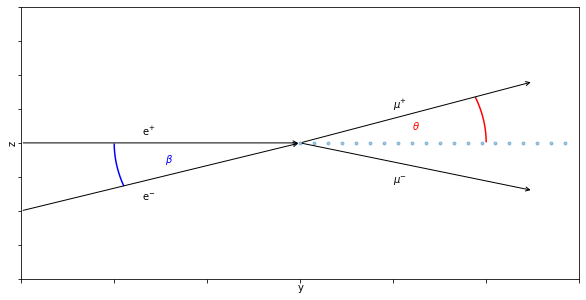

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import exp, sin, cos, tan, sqrt, linspace, meshgrid, array, inf

fig, ax = plt.subplots(figsize=(10, 5))
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel(r"y")
ax.set_ylabel(r"z")
ax.set_xlim(0, 6)
ax.set_ylim(0, 4)

##Electrons
ax.text(1.3, 2.1, "e$^{+}$")
ax.text(1.3, 1.15, "e$^{-}$")
ax.annotate("", xytext=(0, 2), xy=(3, 2), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xytext=(0, 1), xy=(3, 2), arrowprops=dict(arrowstyle="->"))

##Muons
ax.text(4, 2.5, "$\mu^{+}$")
ax.text(4, 1.4, "$\mu^{-}$")
ax.annotate("", xytext=(3, 2), xy=(5.5, 2.9), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xytext=(3, 2), xy=(5.5, 1.3), arrowprops=dict(arrowstyle="->"))

##Angles
ax.plot([3 + 3*i/20 for i in range(20)], 20*[2], ".", alpha=0.4)

def angle(r, n):
    y = linspace(-r, r, n)
    x = array([sqrt(r**2 - y_i**2) for y_i in y])
    return x, y

x, y = angle(2, 100)
ax.plot(x[50:67]+3, y[50:67]+2, color="red")
ax.plot(-x[34:50]+3, y[34:50]+2, color="blue")

ax.text(1.55, 1.7, r"$\beta$", color="blue")
ax.text(4.2, 2.2, r"$\theta$", color="red")

Without loss of generality (because of rotational invariance of the muon decay plane) the kinematic problem can be expressed in the same plane:

$p_{e^+} = \begin{pmatrix}|\vec{p}_{e^+}|\\ 0 \\ |\vec{p}_{e^+}| \\ 0 \end{pmatrix}, \quad p_{e^-} = \begin{pmatrix}|\vec{p}_{e^-}|\\ 0 \\ |\vec{p}_{e^-}|\cos(\beta) \\  |\vec{p}_{e^-}|\sin(\beta) \end{pmatrix}$

$p_{\mu^+} = \begin{pmatrix}|\vec{p}_{\mu^+}|\\ 0 \\ |\vec{p}_{\mu^+}|\cos(\theta) \\ |\vec{p}_{\mu^+}|\sin(\theta)\end{pmatrix}, \quad p_{\mu^-} = \begin{pmatrix}|\vec{p}_{\mu^-}|\\ 0 \\ p^{y}_{\mu^-} \\ p^{z}_{\mu^-}\end{pmatrix}$

Momentum conservation:

$p_{e^+} + p_{e^-} = p_{\mu^+} + p_{\mu^-}$

This leads to three equation: 

I) $|\vec{p}_{e^+}| + |\vec{p}_{e^-}| = |\vec{p}_{\mu^+}| + |\vec{p}_{\mu^-}| = |\vec{p}_{\mu^+}| + \sqrt{(p^{y}_{\mu^-})^2 + (p^{z}_{\mu^-})^2 }$

II) $|\vec{p}_{e^+}| + |\vec{p}_{e^-}|\cos(\beta) = |\vec{p}_{\mu^+}|\cos(\theta) + p^{y}_{\mu^-}$ 

$\Rightarrow p^{y}_{\mu^-} = |\vec{p}_{e^+}| + |\vec{p}_{e^-}|\cos(\beta) - |\vec{p}_{\mu^+}|\cos(\theta)$

III) $|\vec{p}_{e^-}|\sin(\beta) = |\vec{p}_{\mu^+}|\sin(\theta) + p^{z}_{\mu^-}$ 

$\Rightarrow p^{z}_{\mu^-} = |\vec{p}_{e^-}|\sin(\beta) - |\vec{p}_{\mu^+}|\sin(\theta)$

Put II) and III) in I)

$|\vec{p}_{e^+}| + |\vec{p}_{e^-}| = |\vec{p}_{\mu^+}| + \sqrt{|\vec{p}_{e^+}|^2 + 2|\vec{p}_{e^+}||\vec{p}_{e^-}|\cos(\beta) - 2|\vec{p}_{e^+}||\vec{p}_{\mu^+}|\cos(\theta) + |\vec{p}_{e^-}|^2\cos^2(\beta) - 2|\vec{p}_{e^-}||\vec{p}_{\mu^+}|\cos(\beta)\cos(\theta) + |\vec{p}_{\mu^+}|^2\cos^2(\theta) + |\vec{p}_{e^-}|^2\sin^2(\beta) - 2|\vec{p}_{e^-}|\vec{p}_{\mu^+}|\sin(\beta)\sin(\theta) + |\vec{p}_{\mu^+}|^2\sin^2(\theta)}$

$\Leftrightarrow |\vec{p}_{e^+}| + |\vec{p}_{e^-}| = |\vec{p}_{\mu^+}| + \sqrt{|\vec{p}_{e^+}|^2 + |\vec{p}_{e^-}|^2 + |\vec{p}_{\mu^+}|^2 - 2|\vec{p}_{e^-}||\vec{p}_{\mu^+}|\cos(\theta - \beta) + 2|\vec{p}_{e^+}||\vec{p}_{e^-}|\cos(\beta) - 2|\vec{p}_{e^+}||\vec{p}_{\mu^+}|\cos(\theta)}$

$\Leftrightarrow |\vec{p}_{\mu^+}| = \frac{|\vec{p}_{e^+}||\vec{p}_{e^-}|(1 - \cos(\beta))}{|\vec{p}_{e^+}|(1 - \cos(\theta)) + |\vec{p}_{e^-}|(1 - \cos(\theta - \beta))}$

So finally the differential cross section in depedence of the scatter angle $\theta$ can be expressed as:

$\frac{d\sigma}{d\cos(\theta)}(e^+e^- \to \mu^+\mu^-) = \frac{d\sigma}{dt}\frac{dt}{d\cos(\theta)} = \frac{d\sigma}{dt}\frac{|\vec{p}_{e^+}|^2|\vec{p}_{e^-}|^3(1-\cos(\beta))(\sin(\beta)\tan(\frac{\theta}{2}) + \cos(\beta) - 1)}{(|\vec{p}_{e^+}|(1 - \cos(\theta)) + |\vec{p}_{e^-}|(1 - \cos(\theta - \beta)))^2}$

To calculate the event yield expected from this configuration, the differential cross section has to be multiplied with the insteanous luminisity:

$\frac{dN}{dt} = \mathcal{L} \cdot \frac{d\sigma}{d\cos(\theta)}$

The luminosity can be taken as the luminisity of a circular collider with a modification factor because of the tilted collision instead of head to head collision.

$\mathcal{L} = \mathcal{L}^{collider}\frac{\sin^2(\frac{\beta}{2})}{\pi\sigma_s\sigma_x}\int\int e^{-x^2(\frac{\sin^2(\frac{\beta}{2})}{\sigma^2_x} + \frac{\cos^2(\frac{\beta}{2})}{\sigma^2_s}) -s^2(\frac{\cos^2(\frac{\beta}{2})}{\sigma^2_x} + \frac{\sin^2(\frac{\beta}{2})}{\sigma^2_s})}dxds \text{,} \quad \mathcal{L}^{collider} = \frac{N_{e^+}N_{e^-}N_b f}{4\pi\sigma_x\sigma_y}$

$\quad = \mathcal{L}^{collider}\frac{\sin^2(\frac{\beta}{2})}{\pi\sigma_s\sigma_x}\frac{\sqrt{\pi}}{\sqrt{\frac{\sin^2(\frac{\beta}{2})}{\sigma^2_x} + \frac{\cos^2(\frac{\beta}{2})}{\sigma^2_s}}}\int e^{-s^2(\frac{\cos^2(\frac{\beta}{2})}{\sigma^2_x} + \frac{\sin^2(\frac{\beta}{2})}{\sigma^2_s})}ds$

$\quad = \mathcal{L}^{collider}\frac{\sin^2(\frac{\beta}{2})}{\sigma_s\sigma_x\sqrt{(\frac{\sin^2(\frac{\beta}{2})}{\sigma^2_x} + \frac{\cos^2(\frac{\beta}{2})}{\sigma^2_s})(\frac{\cos^2(\frac{\beta}{2})}{\sigma^2_x} + \frac{\sin^2(\frac{\beta}{2})}{\sigma^2_s})}}$

In [2]:
from scipy.constants import pi, m_e, c, hbar, fine_structure as alpha
from scipy import integrate

m_e = (m_e*10**-9/c**2) ##[GeV]
m_mu = 206.768 * m_e ##[GeV]

##Function for calculating muon energy
def pMu(pMinus, pPlus, beta, theta): #[GeV], [GeV], [rad], [rad]
    return pMinus*pPlus*(1-cos(beta))/(pPlus*(1-cos(theta))+pMinus*(1-cos(theta-beta))) ## [GeV]

##Function for calculating s
def s(pMinus, pPlus, beta):  #[GeV], [GeV], [rad], [rad]
    return 2*m_e**2 + 2*pPlus*pMinus*(1-cos(beta)) ##[GeV^2]

##Function for calculating t
def t(pMinus, pPlus, beta, theta): #[GeV], [GeV], [rad], [rad]
    return 2*m_e**2 + 2*m_mu**2 - 2*pMu(pMinus, pPlus, beta, theta)*pPlus*(1-cos(theta)) ##[GeV^2]

##Function for calculating cross section
def xSec(pMinus, pPlus, beta, theta): #[GeV], [GeV], [rad], [rad]
    sV = s(pMinus, pPlus, beta)
    tV = t(pMinus, pPlus, beta, theta)
    
    dtdcos = (2*pPlus**2 * pMinus**3 * (1-cos(beta)) * (sin(beta) * tan(theta/2.) + cos(beta) - 1))/(pPlus*(1-cos(theta))+pMinus*(1-cos(theta-beta)))**2
    dsigdt = 2*pi*alpha**2/(sV**3 * (sV - 4*m_e**2) ) * (2*tV**2 + 2*sV*tV + sV**2 - 4*(m_mu**2 + m_e**2)*tV + 2*(m_mu**2 + m_e**2)**2)
    
    return dsigdt * dtdcos * 2.56819*10**9 #[pb]

def lumi(n1, n2, nb, f, sigmaX, sigmaY, sigmaS, beta): #[1, 1, 1, 1/s, m, m, m, rad]    
    nomLumi = (n1*n2*nb*f)/(4*pi* sigmaY * sigmaX)
    corrFac = (sin(beta/2)**2)/(sigmaX*sigmaS*sqrt((sin(beta/2)**2/sigmaS**2 + cos(beta/2)**2/sigmaX**2)*(sin(beta/2)**2/sigmaX**2 + cos(beta/2)**2/sigmaS**2)))
    
    return nomLumi * corrFac * 10**(-28) * 10 ** (-12)

In [3]:
from scipy.optimize import newton

mRes = 3 ##Y/psi resonance [GeV]

EMinus = range(10, 35, 5) ##[GeV]
EPlus = linspace(5, 60, 50) ##[GeV]
beta = linspace(0.01, 0.15, 50) ##[rad]

##Array w
resLine = [newton(lambda b, Ep: s(E_, Ep, b) - mRes**2, beta, args=(EPlus,)) for E_ in EMinus]

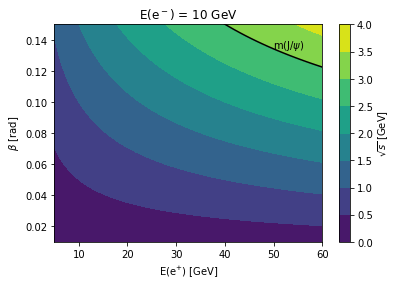

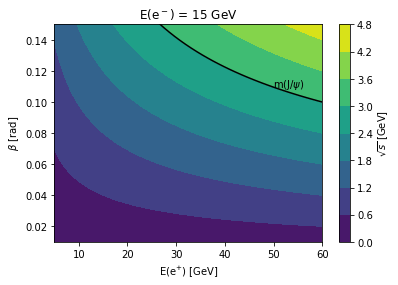

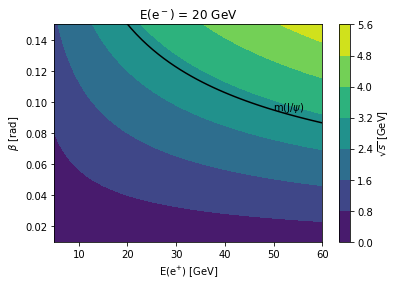

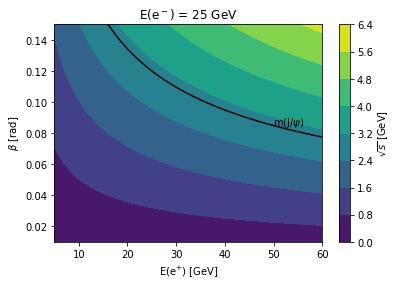

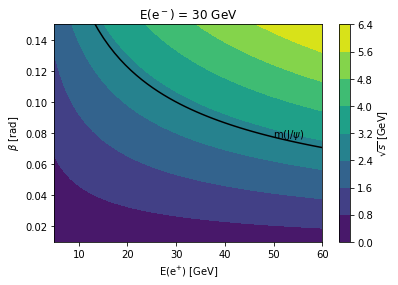

In [4]:
EPlusG, betaG = meshgrid(EPlus, beta)

for i, E_ in enumerate(EMinus):

    sqrtS = array([sqrt(s(E, E_, t)) for (E, t) in zip(EPlusG, betaG)]) ##[GeV]

    fig, ax = plt.subplots()
    ax.set_title(r"E(e$^{Q}$) = {E} GeV".format(Q="-", E=E_))
    ax.set_xlabel(r"E(e$^{+}$) [GeV]")
    ax.set_ylabel(r"$\beta$ [rad]")
    ax.set_ylim(beta[0], beta[-1])

    ax.plot(EPlus, resLine[i], color="black")
    ax.text(EPlus[40], resLine[i][40], r"m(J/$\psi)$")
    cs = ax.contourf(EPlusG, betaG, sqrtS)
    cb =fig.colorbar(cs, ax=ax)
    cb.set_label(r"$\sqrt{s}$ [GeV]")

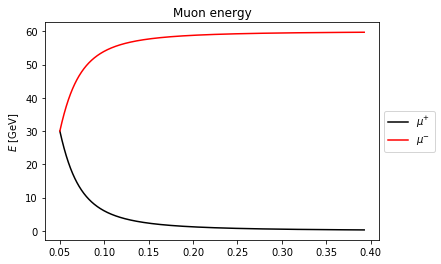

In [5]:
beta = 0.05#rad
theta = linspace(beta, pi/8, 1000) #rad
E_= 30 #GeV
EPlus = 30 #GeV

muP = [pMu(E_, EPlus, beta, t) for t in theta]
mu_ = [E_+ EPlus - muE for muE in muP]

fig, ax = plt.subplots()
ax.set_title(r"Muon energy")
ax.set_ylabel(r"$E$ [GeV]")
ax.plot(theta, muP, color="black", label = r"$\mu^{+}$")
ax.plot(theta, mu_, color="red", label = r"$\mu^{-}$")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

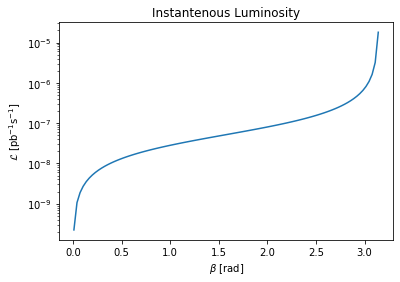

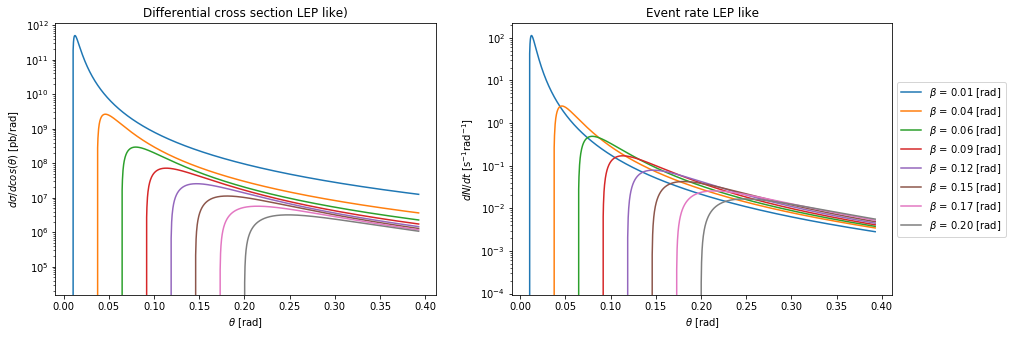

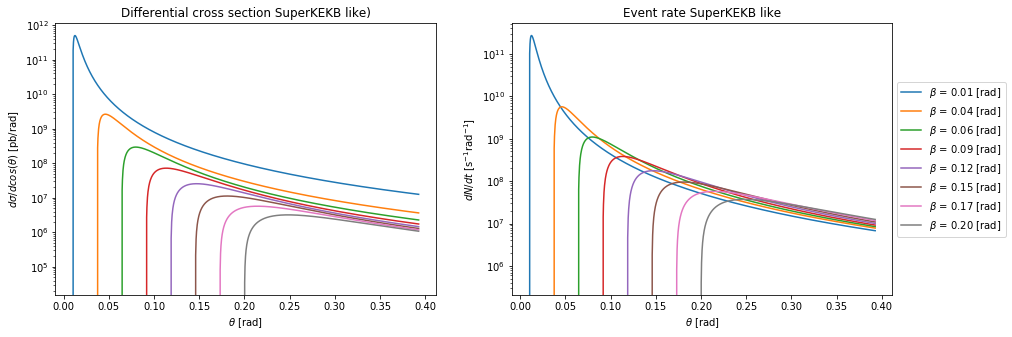

In [6]:
beta = linspace(0.01, pi, 100)#rad
E_= 30 #GeV
EPlus = 30 #GeV

lum = [lumi(1.7e11, 1.7e11, 7, 11.2e3, 200e-6, 5e-6, 7e-2, b) for b in beta]

fig, ax = plt.subplots()
ax.set_title(r"Instantenous Luminosity")
ax.set_xlabel(r"$\beta$ [rad]")
ax.set_ylabel(r"$\mathcal{L}$ [pb$^{-1}$s$^{-1}$]")
ax.set_yscale('log')
ax.plot(beta, lum)

beta = linspace(0.01, 0.2, 8)
lumLEP = [lumi(1.7e11, 1.7e11, 7, 11.2e3, 200e-6, 5e-6, 7e-2, b) for b in beta]
lumKEK = [lumi(6e10, 6e10, 2500, 500e6, 10e-6, 62e-9, 5e-3, b) for b in beta]

for lum, name in zip([lumLEP, lumKEK], ["LEP like", "SuperKEKB like"]):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].set_title(r"Differential cross section {})".format(name))
    ax[0].set_xlabel(r"$\theta$ [rad]")
    ax[0].set_ylabel(r"$d\sigma/dcos(\theta)$ [pb/rad]")
    ax[0].set_yscale('log')

    ax[1].set_title(r"Event rate {}".format(name))
    ax[1].set_xlabel(r"$\theta$ [rad]")
    ax[1].set_ylabel(r"$dN/dt$ [s$^{-1}$rad$^{-1}$]")
    ax[1].set_yscale('log')

    for index, b in enumerate(beta):
        theta = linspace(b, pi/8, 1000) #rad
        sec = [xSec(E_, EPlus, b, angle) for angle in theta]
        N = [s*lum[index] for s in sec]

        ax[0].plot(theta, sec, label=r"$\beta$ = {:.2f} [rad]".format(b))
        ax[1].plot(theta, N, label=r"$\beta$ = {:.2f} [rad]".format(b))

    ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))